### Task 1

In [1]:
from math import cos, sqrt
import numpy as np
import matplotlib.pyplot as plt

LBOUND = -1.5
RBOUND = 0.55
DEFAULT_STEP = 1e-5

STEP_LBOUND = 1e-5
STEP_RBOUND = 1e-1
STEP_STEP = 1e-6

SHIFT = 0.01

u_lbound = 0.0

/tmp/ipykernel_10106/2175854699.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


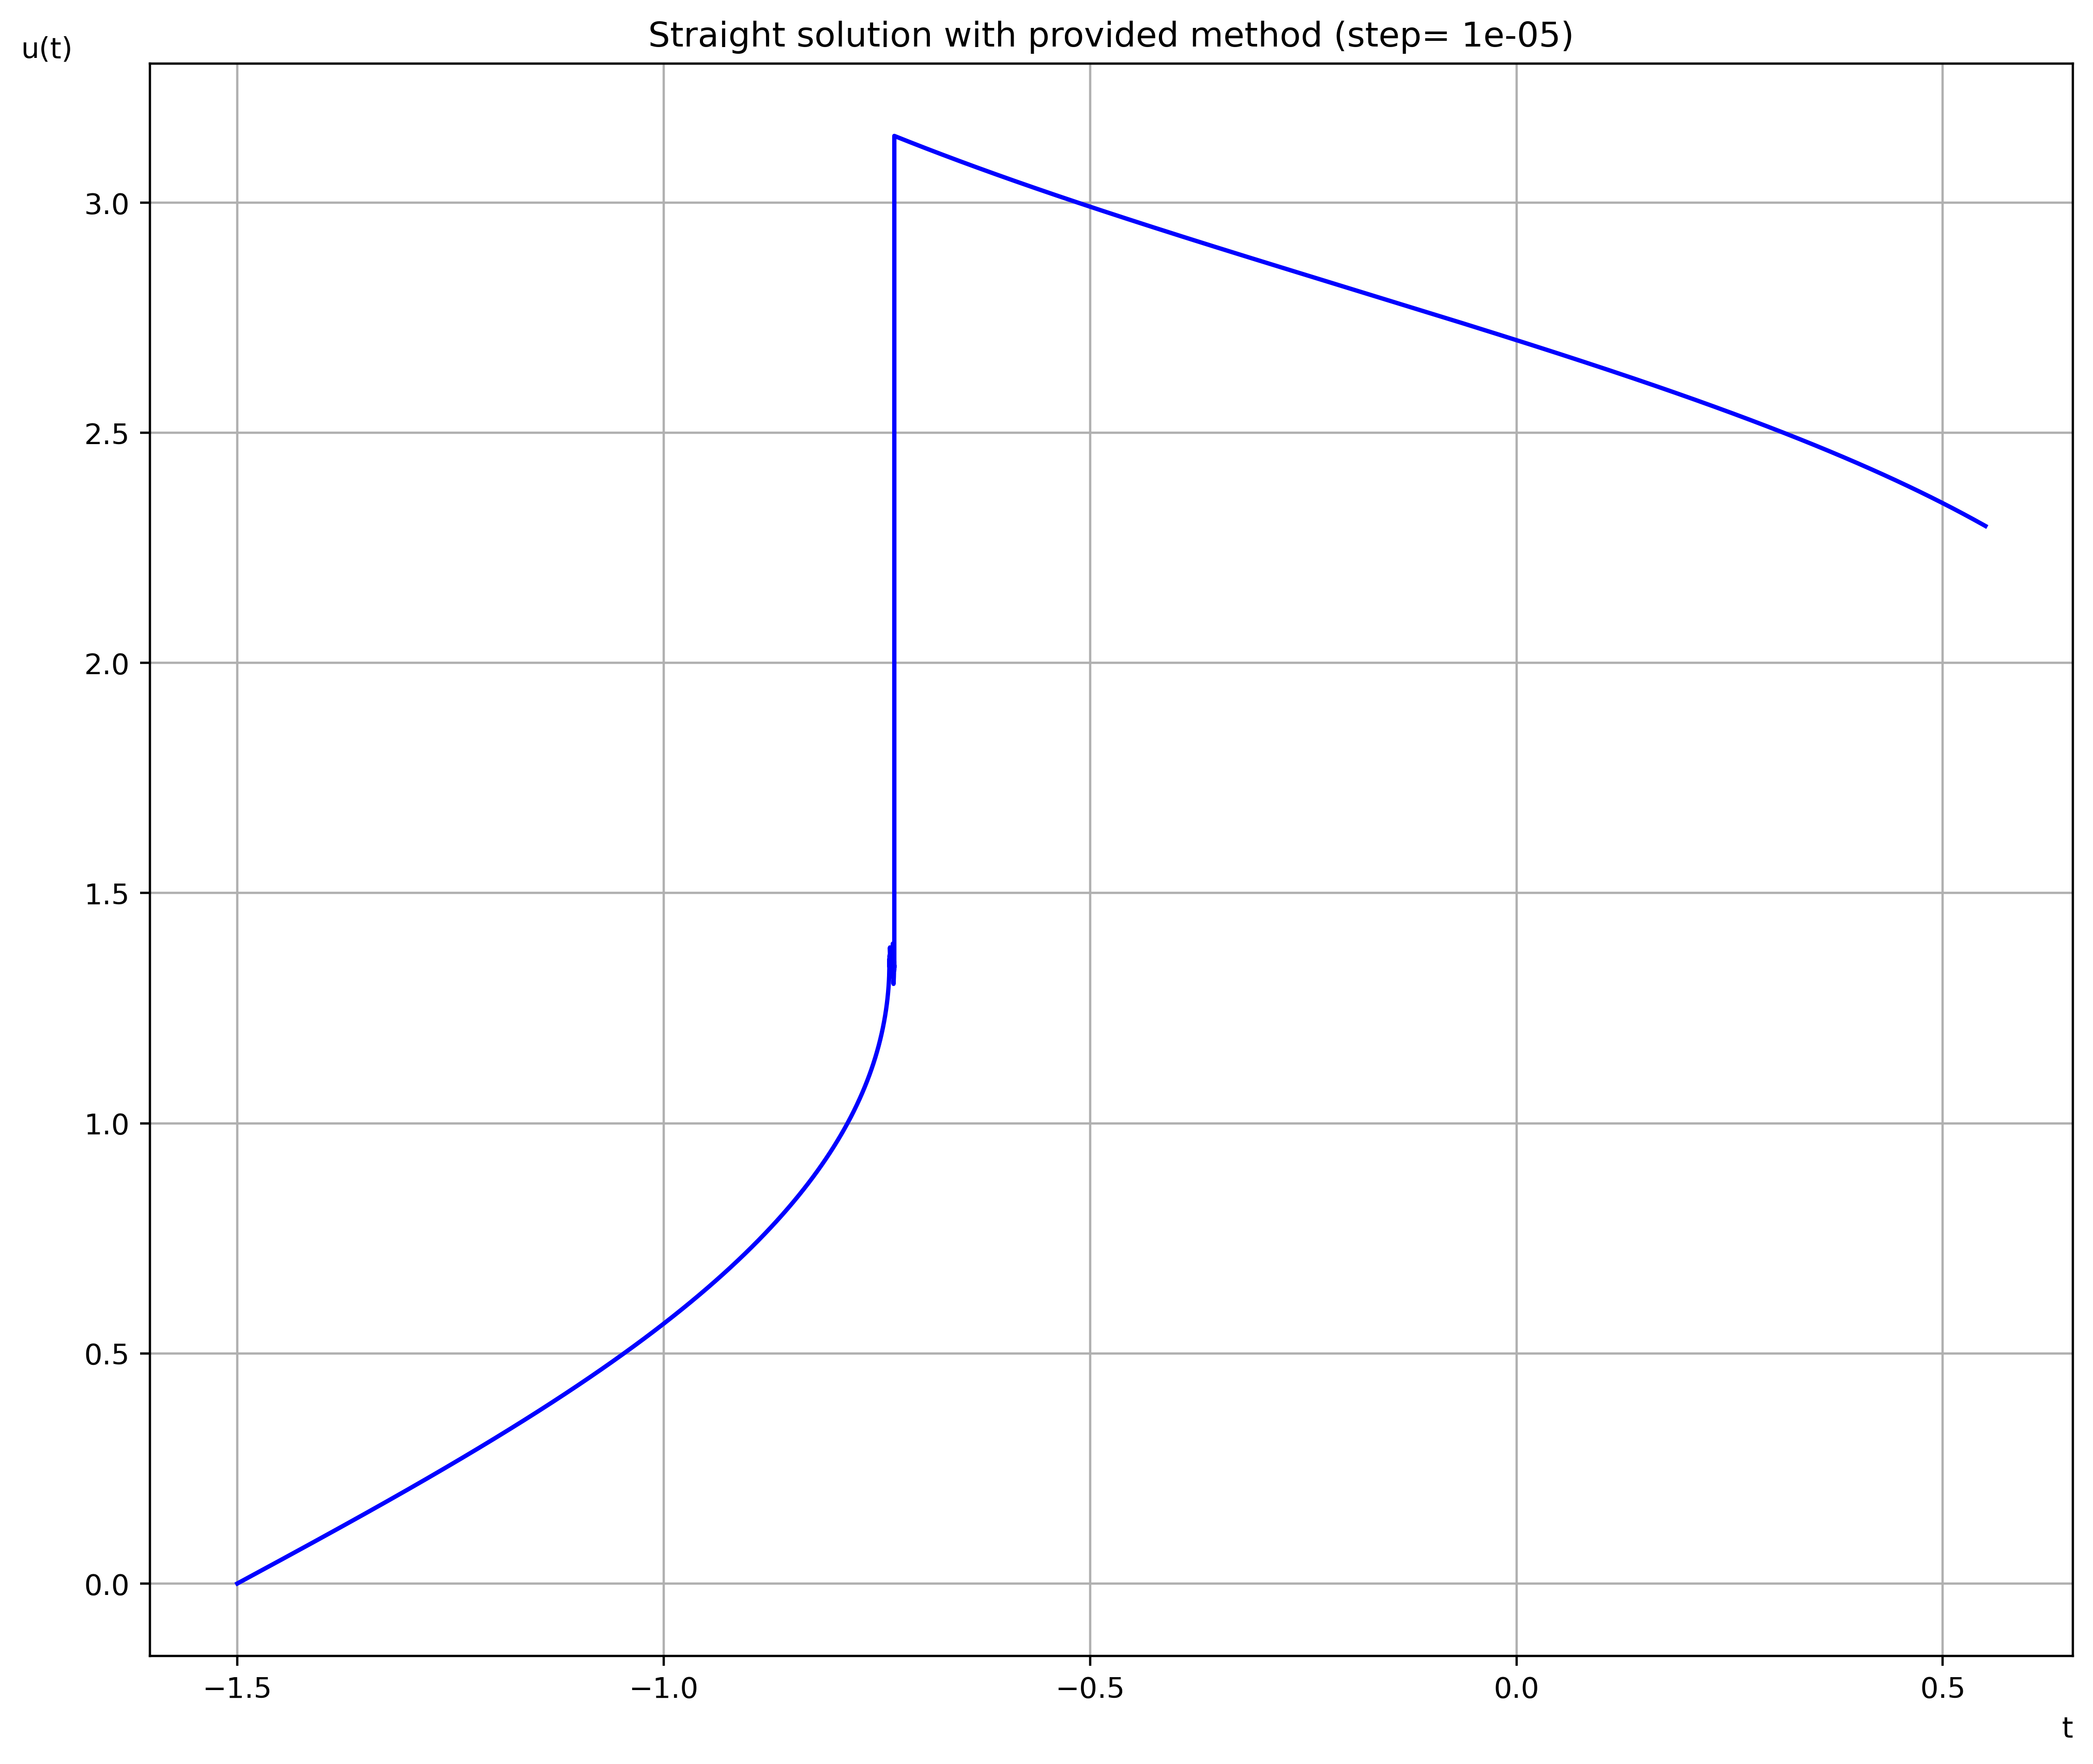

In [2]:

def f(t: float, u: float) -> float:
        return 1 / (1 - u * cos(t))

def f_shifted(t: float, u: float) -> float:
        return f(t, u) + SHIFT

def solve_diff_eq_numerical(f, u_lbound: float, step: float) -> (np.ndarray, np.ndarray):
        # Use Euler scheme to find function's values at second knot
        t_arr = np.arange(LBOUND, RBOUND, step)
        u_list = [u_lbound, f(LBOUND, u_lbound) * step + u_lbound]

        while len(u_list) < len(t_arr):
                u_list.append(u_list[-2] + step *
                              (f(t_arr[len(u_list) - 1], u_list[-1]) +
                               f(t_arr[len(u_list) - 2], u_list[-2])))
        
        return (t_arr, np.array(u_list))

t_arr, u_arr = solve_diff_eq_numerical(f, u_lbound, DEFAULT_STEP)
fig1, ax1 = plt.subplots()
fig1.set_figheight(10)
fig1.set_figwidth(12)
ax1.set_title(f'Straight solution with provided method (step= {DEFAULT_STEP})')
ax1.set_xlabel('t', loc='right')
ax1.set_ylabel('u(t)', loc='top', rotation='horizontal')
ax1.grid()
fig1.set_dpi(400)
ax1.plot(t_arr, u_arr, '-b')
fig1.show()

/tmp/ipykernel_10106/3322622240.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


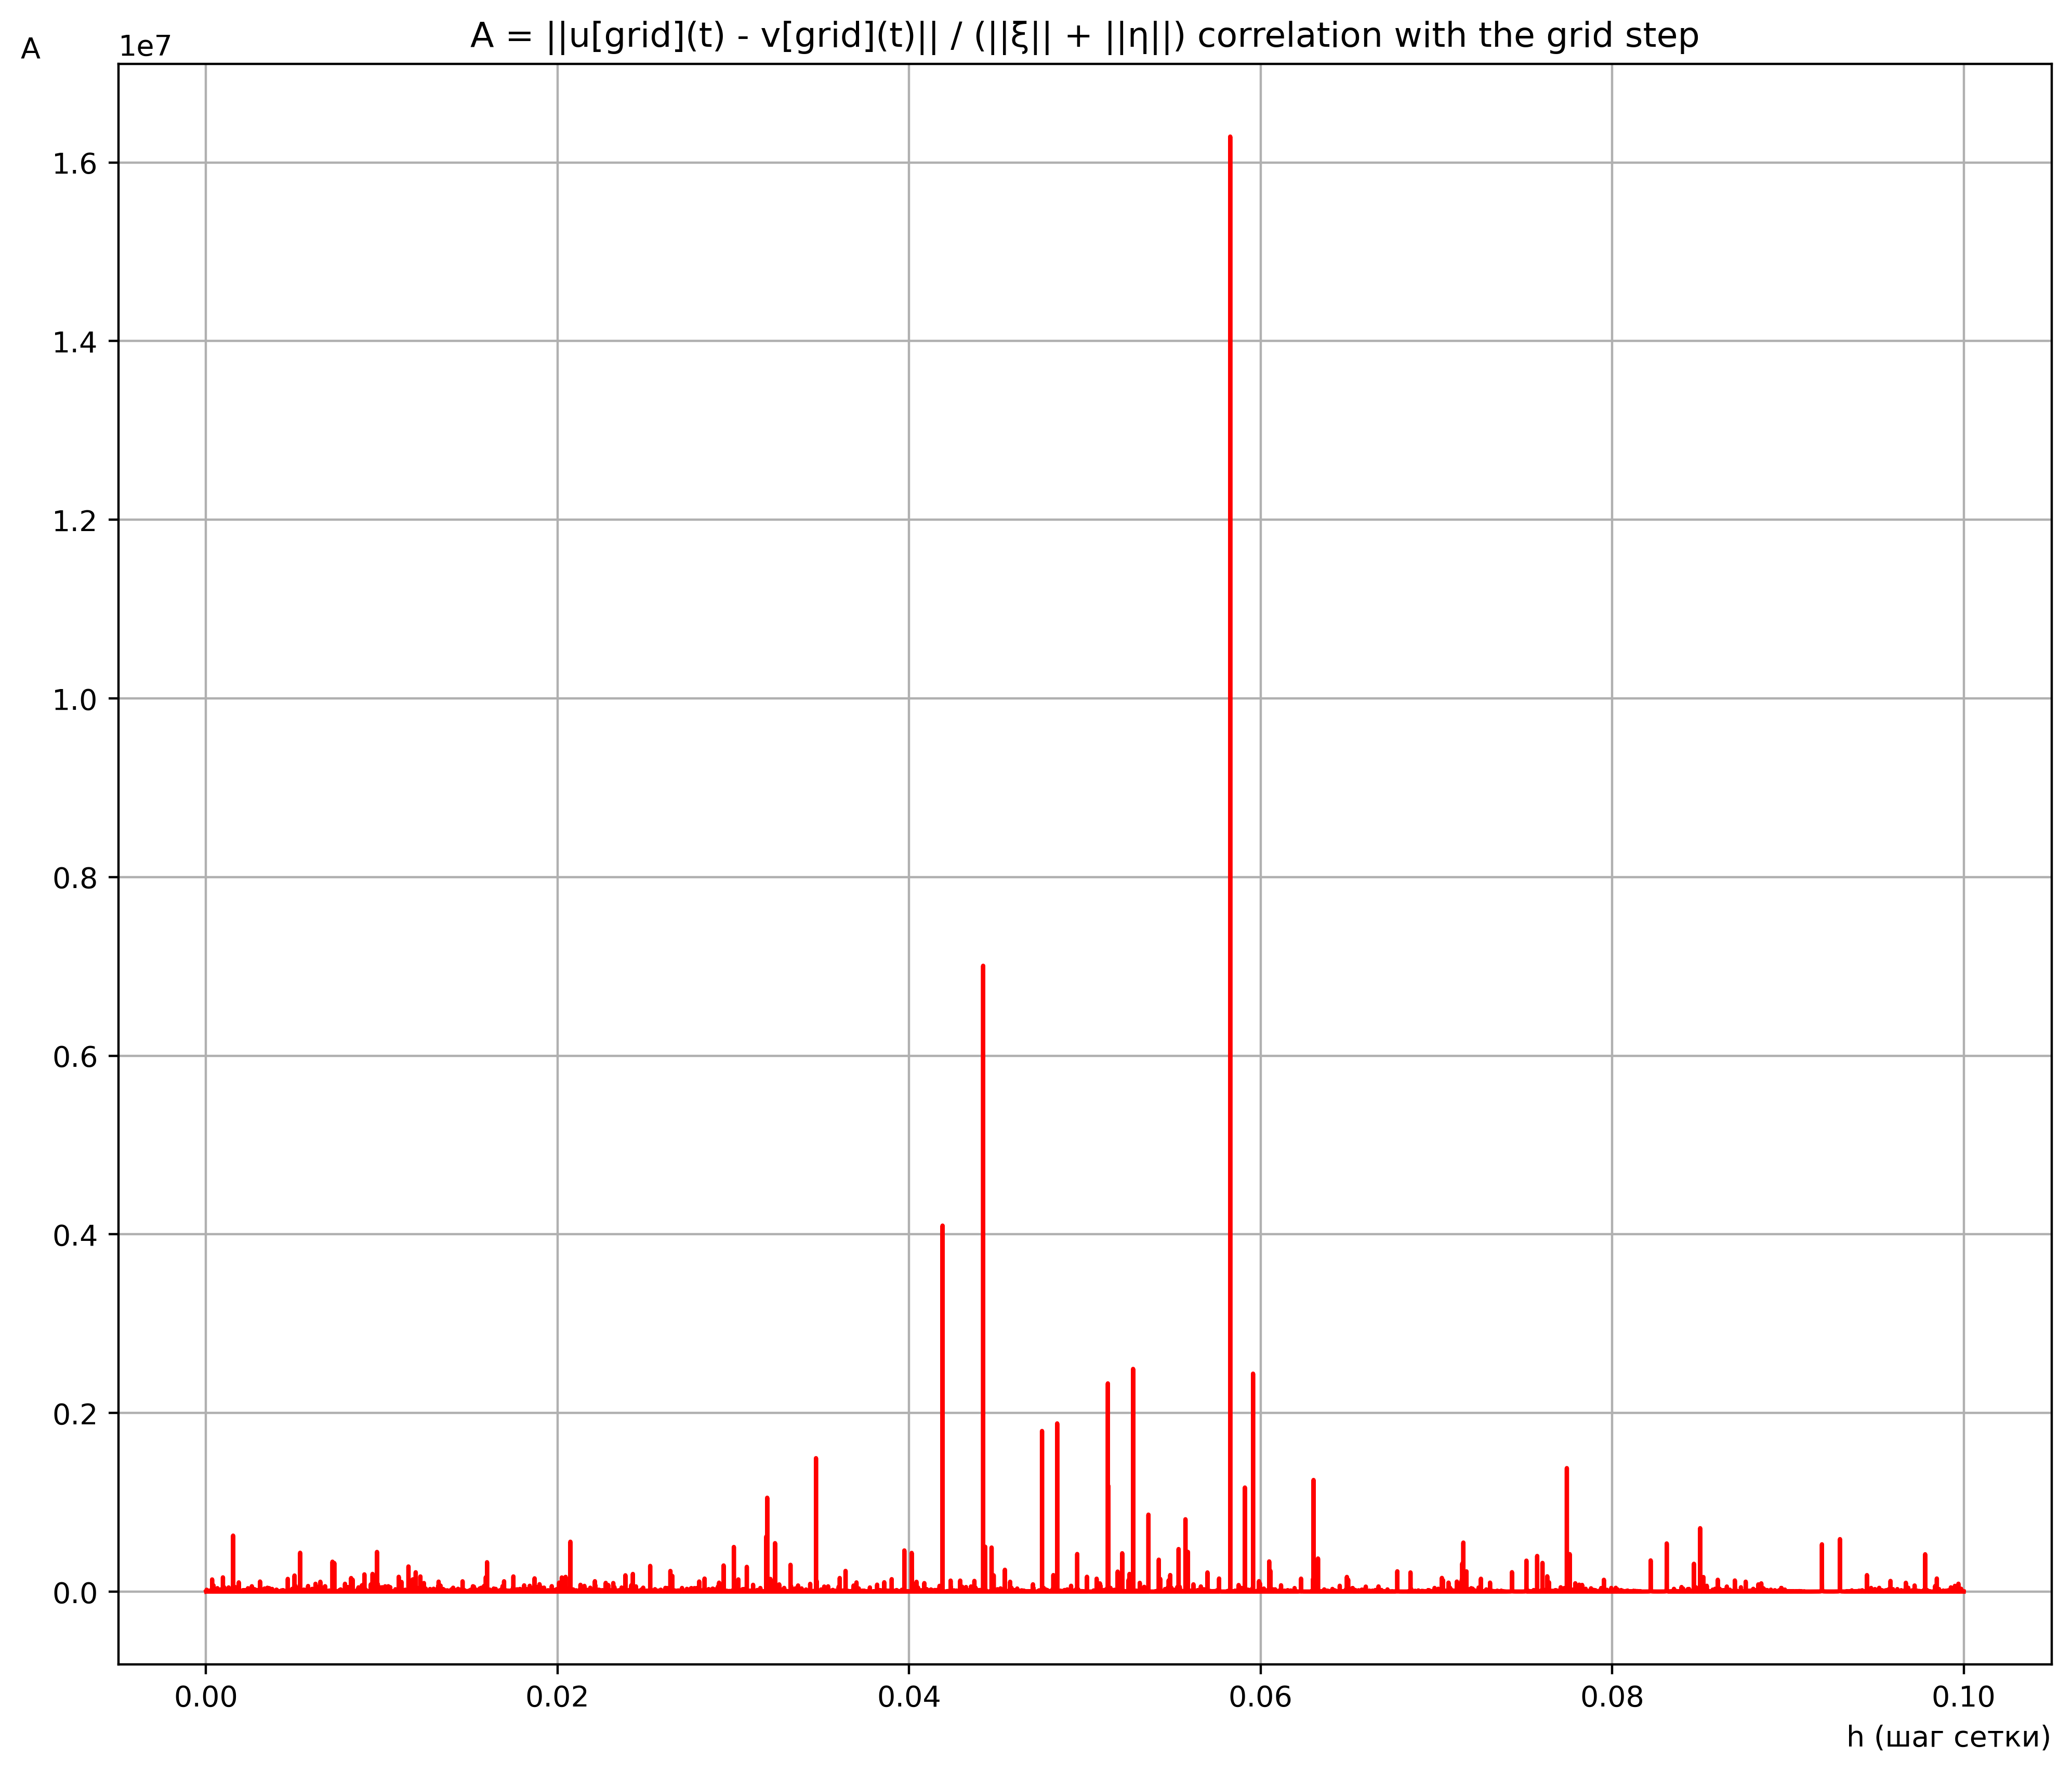

In [3]:
indic_list = list()
step_arr = np.arange(STEP_LBOUND, STEP_RBOUND, STEP_STEP)

for step in step_arr:
        t_arr_orig, u_arr_orig = solve_diff_eq_numerical(f, u_lbound, step)
        t_arr_shifted, u_arr_shifted = solve_diff_eq_numerical(f_shifted, u_lbound + SHIFT, step)
        indic_list.append(sqrt(sum(np.power(u_arr_orig - u_arr_shifted, 2))) / sqrt((SHIFT ** 2) * len(t_arr_shifted)))

fig2, ax2 = plt.subplots()
fig2.set_figheight(10)
fig2.set_figwidth(12)
ax2.set_title('A = ||u[grid](t) - v[grid](t)|| / (||ξ|| + ||η||) correlation with the grid step')
ax2.set_xlabel('h (шаг сетки)', loc='right')
ax2.set_ylabel('A', loc='top', rotation='horizontal')
ax2.grid()
fig2.set_dpi(400)
ax2.plot(step_arr, indic_list, '-r')
fig2.show()


### Task 2

In [4]:
LBOUND = 0.0
RBOUND = 4 * np.pi
STEP = 1e-5

u_lbound = 1.0
def f(u: float) -> float:
        return -1 * np.sin(u)

t_arr = np.arange(LBOUND, RBOUND, STEP)
nnodes = len(t_arr)

/tmp/ipykernel_10106/675443937.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figE.show()


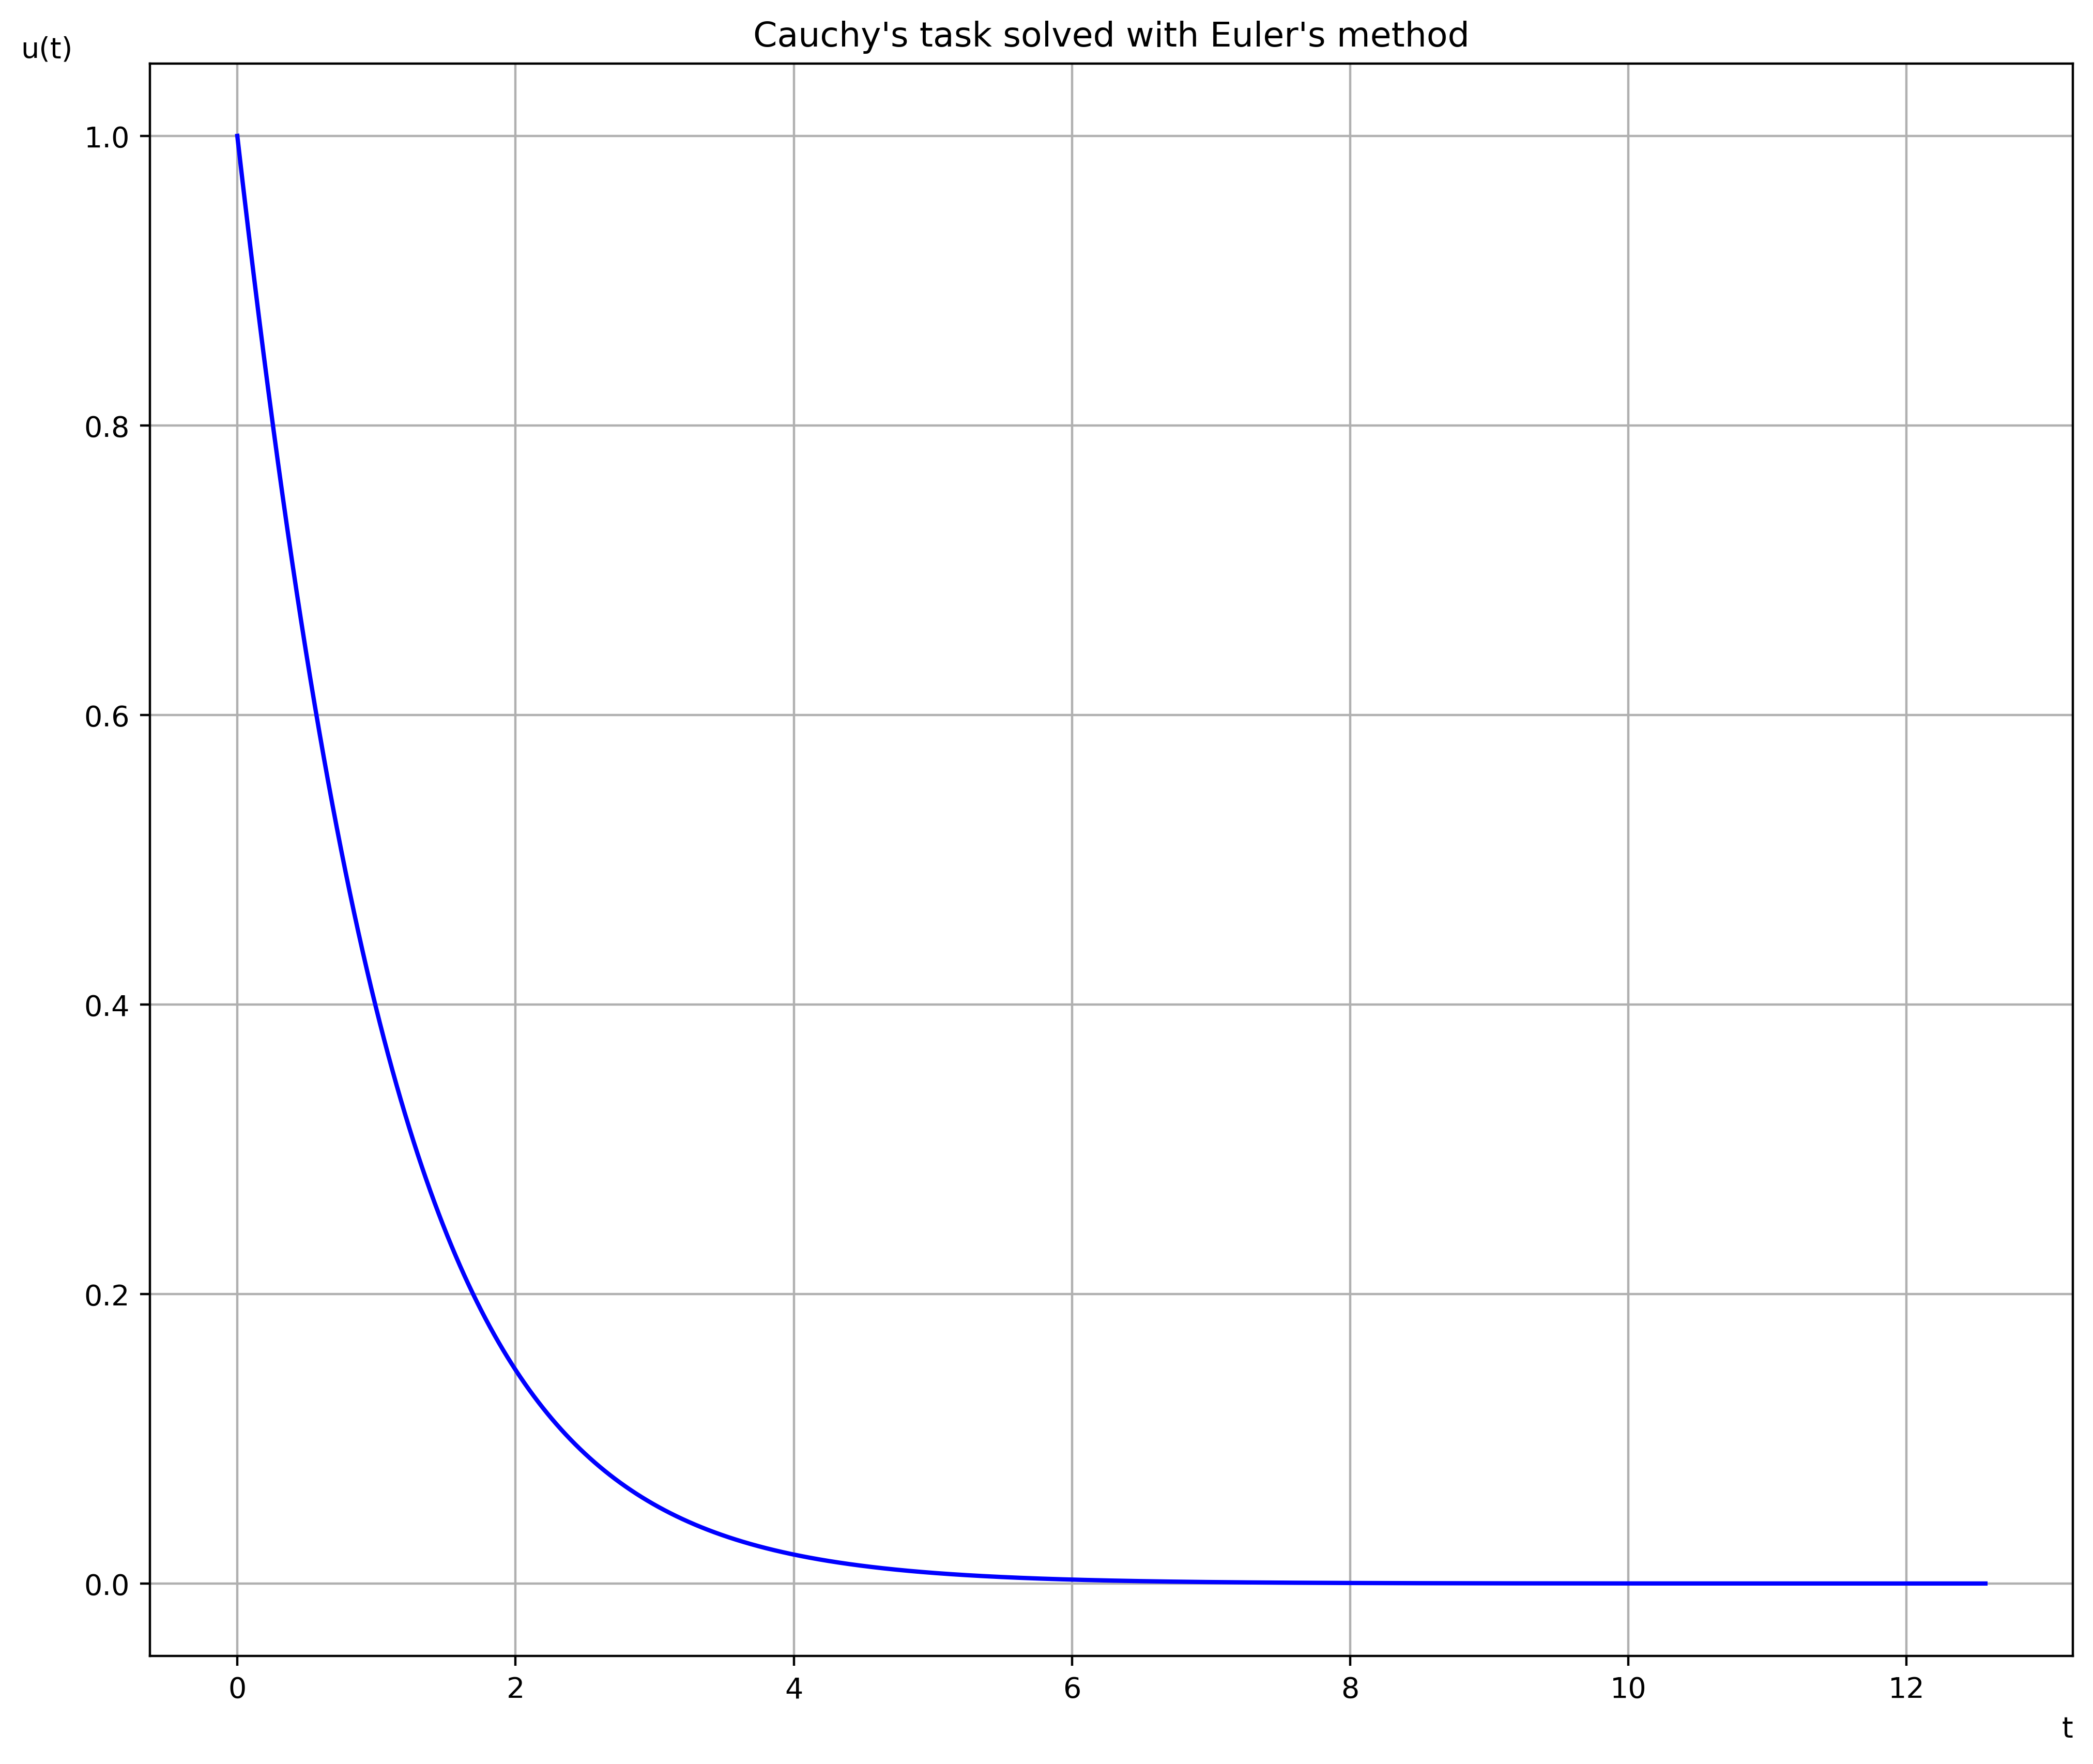

In [5]:
# Euler's method
u_list_E = [u_lbound]
while len(u_list_E) < len(t_arr):
        u_list_E.append(f(u_list_E[-1]) * STEP + u_list_E[-1])

figE, axE = plt.subplots()
figE.set_figheight(10)
figE.set_figwidth(12)
axE.set_title('Cauchy\'s task solved with Euler\'s method')
axE.set_xlabel('t', loc='right')
axE.set_ylabel('u(t)', loc='top', rotation='horizontal')
axE.grid()
figE.set_dpi(400)
axE.plot(t_arr, u_list_E, '-b')
figE.show()

/tmp/ipykernel_10106/2260247284.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figRK.show()


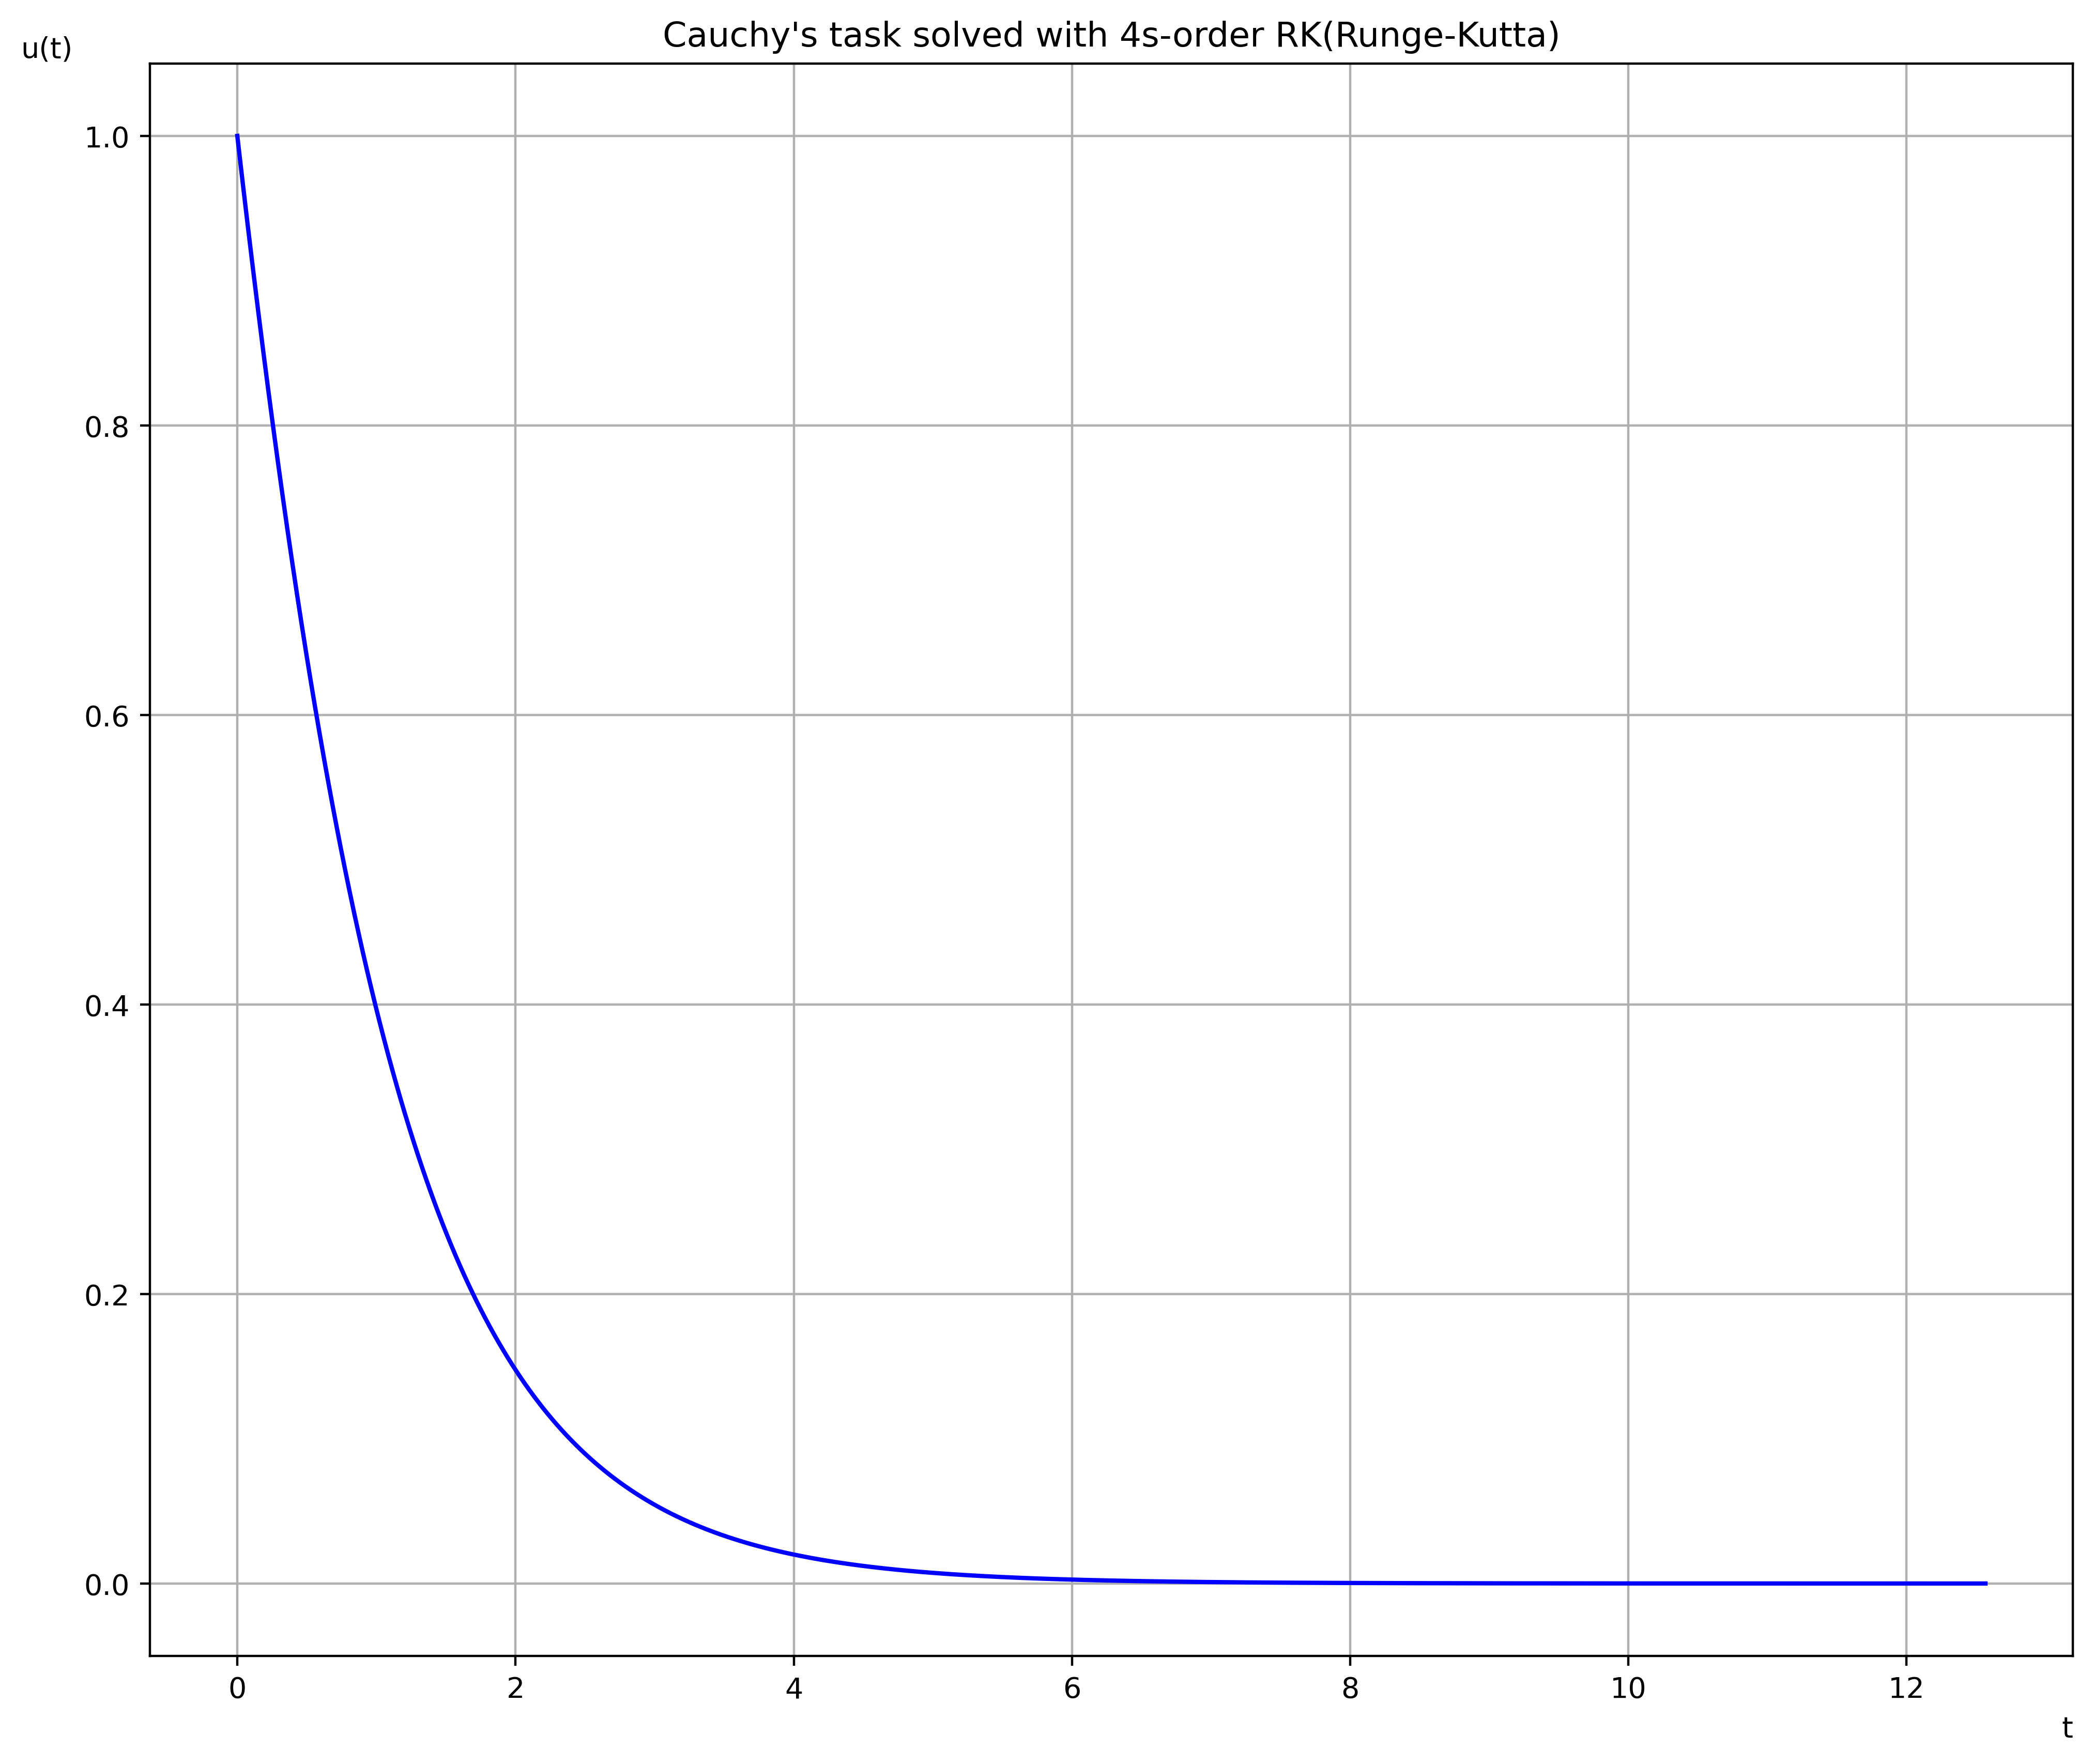

In [6]:
# RK-method
u_list_RK = [u_lbound]
while len(u_list_RK) < len(t_arr):
        u = u_list_RK[-1]
        k1 = STEP * f(u)
        k2 = STEP * f(u + k1 / 2)
        k3 = STEP * f(u + k2 / 2)
        k4 = STEP * f(u + k3)
        u_list_RK.append(u + (k1 + 2 * k2 + 2 * k3 + k4) / 6)

figRK, axRK = plt.subplots()
figRK.set_figheight(10)
figRK.set_figwidth(12)
axRK.set_title('Cauchy\'s task solved with 4s-order RK(Runge-Kutta)')
axRK.set_xlabel('t', loc='right')
axRK.set_ylabel('u(t)', loc='top', rotation='horizontal')
axRK.grid()
figRK.set_dpi(400)
axRK.plot(t_arr, u_list_RK, '-b')
figRK.show()

/tmp/ipykernel_10106/1927880890.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figBoth.show()


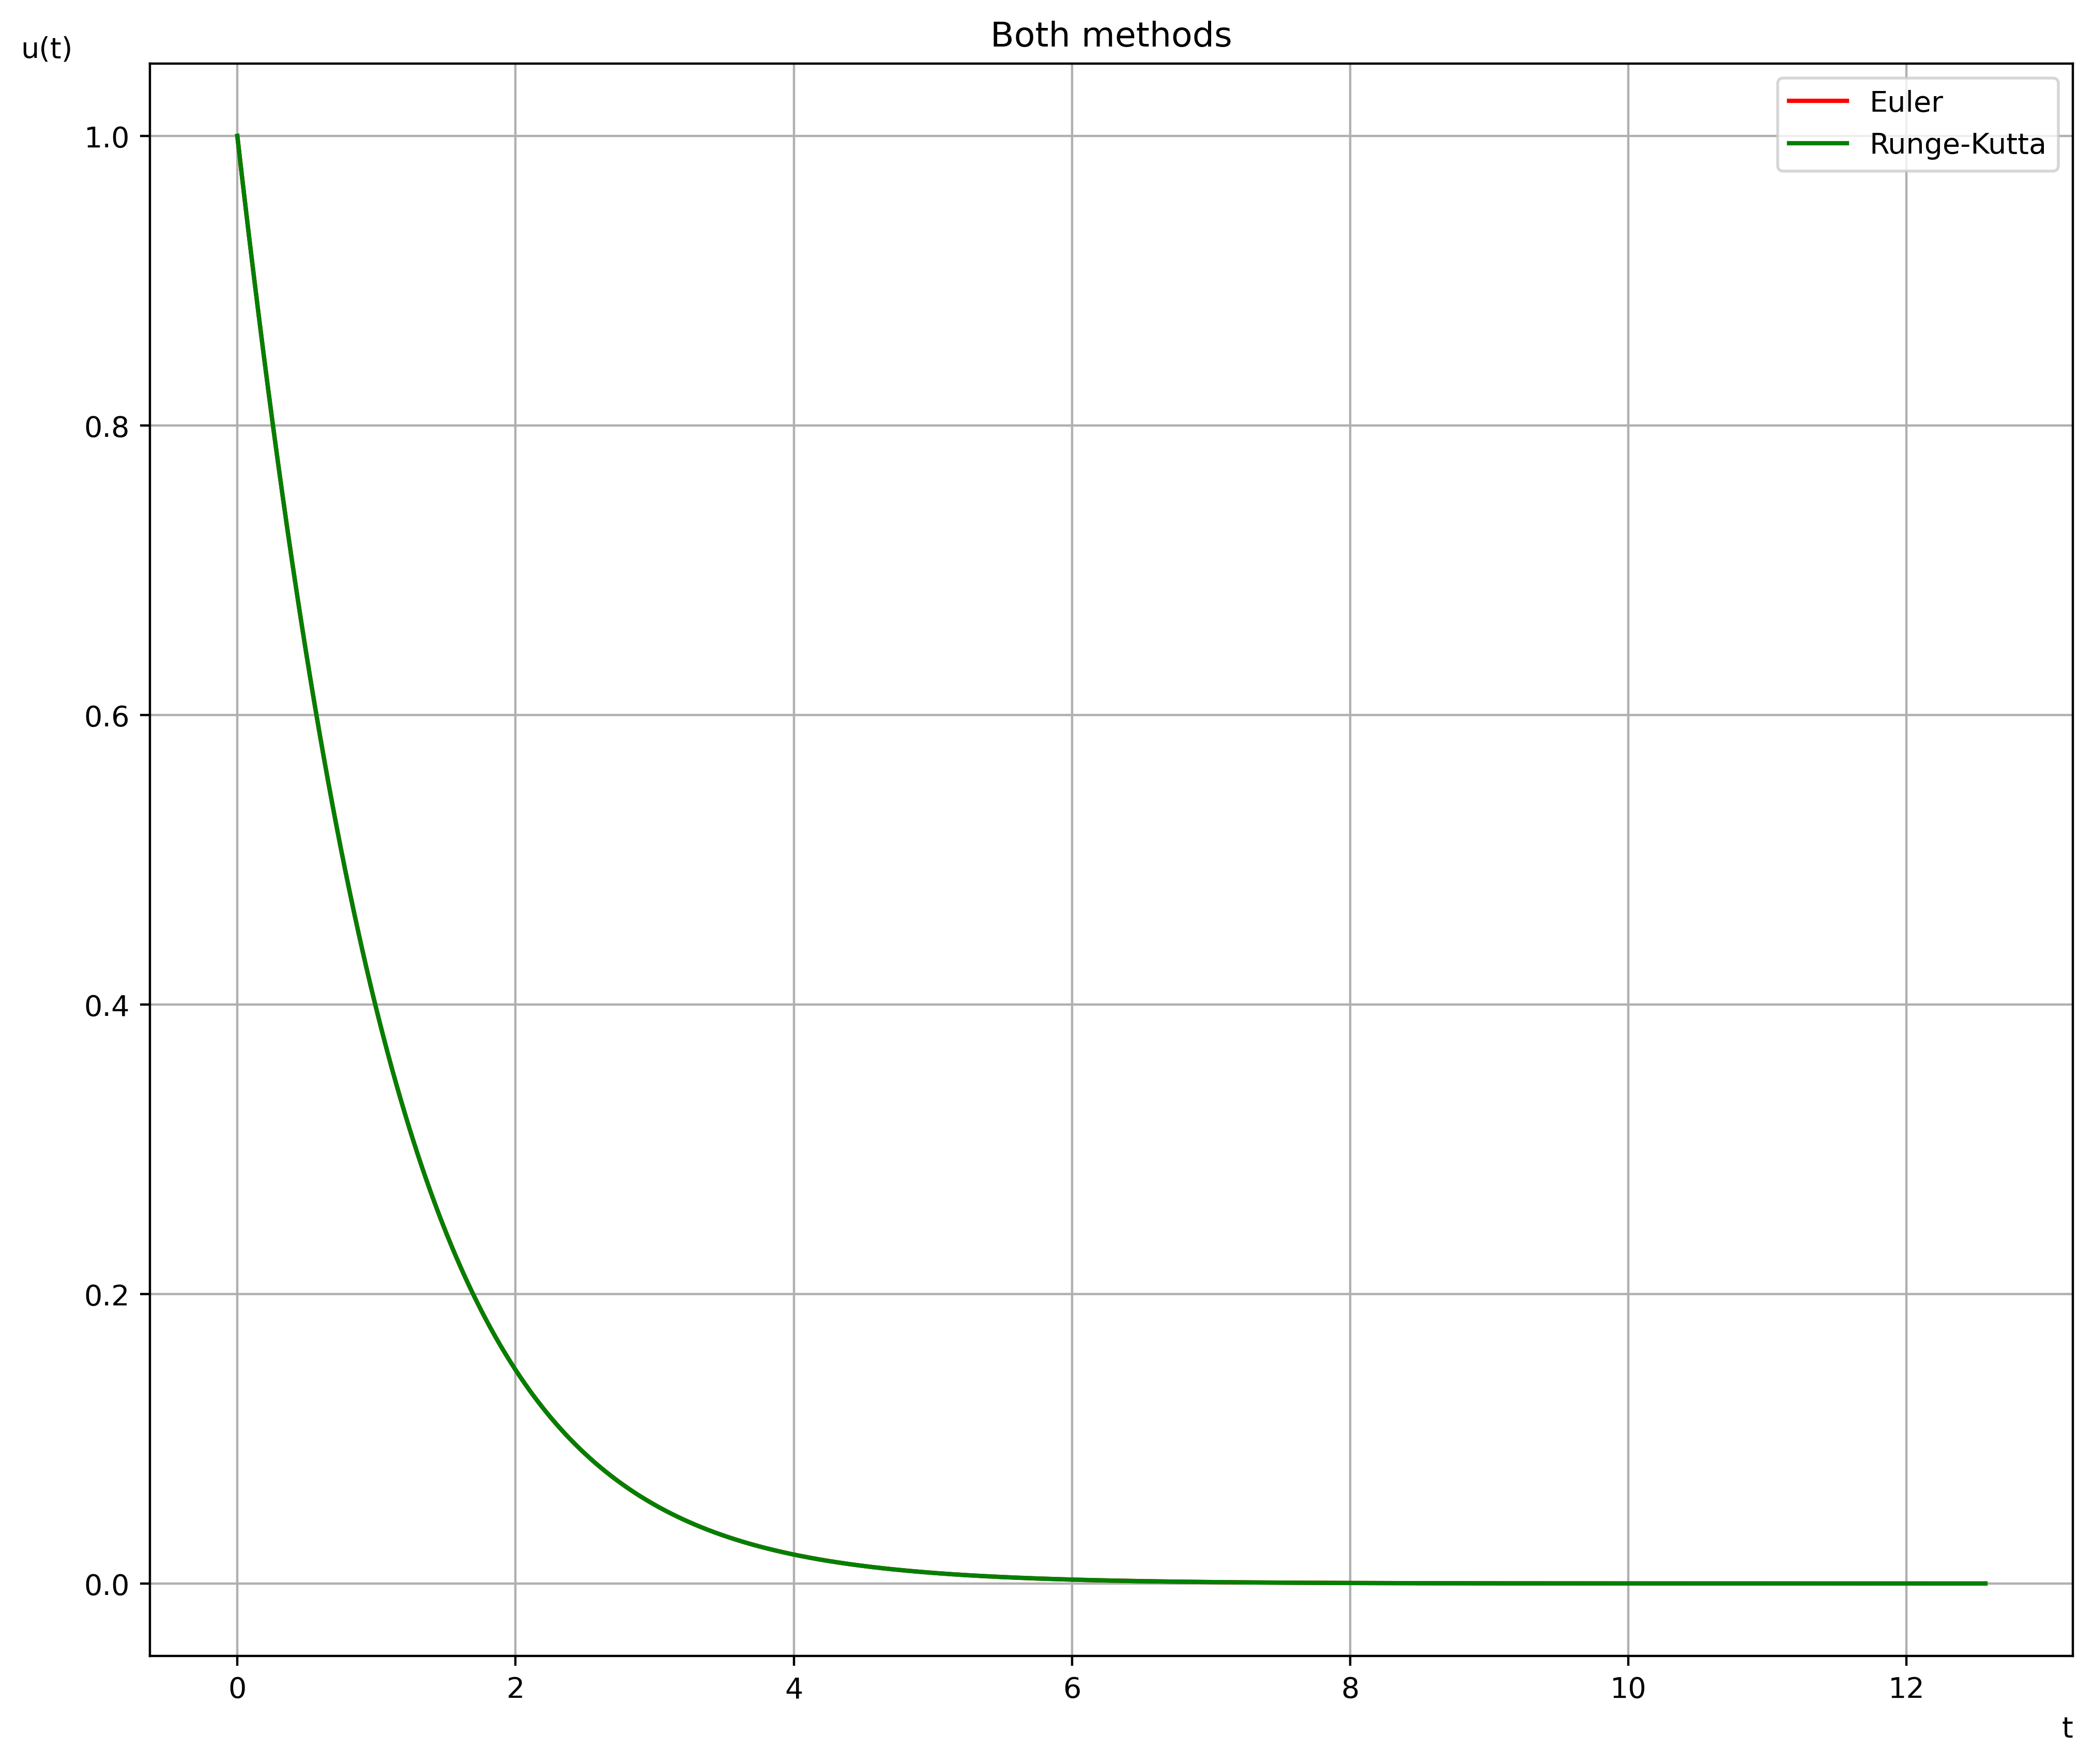

In [7]:
figBoth, axBoth = plt.subplots()
figBoth.set_figheight(10)
figBoth.set_figwidth(12)
axBoth.set_title('Both methods')
axBoth.set_xlabel('t', loc='right')
axBoth.set_ylabel('u(t)', loc='top', rotation='horizontal')
axBoth.grid()
figBoth.set_dpi(400)
axBoth.plot(t_arr, u_list_E, '-r', label='Euler')
axBoth.plot(t_arr, u_list_RK, '-g', label='Runge-Kutta')
axBoth.legend()
figBoth.show()

/tmp/ipykernel_10106/3993523931.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figComp.show()


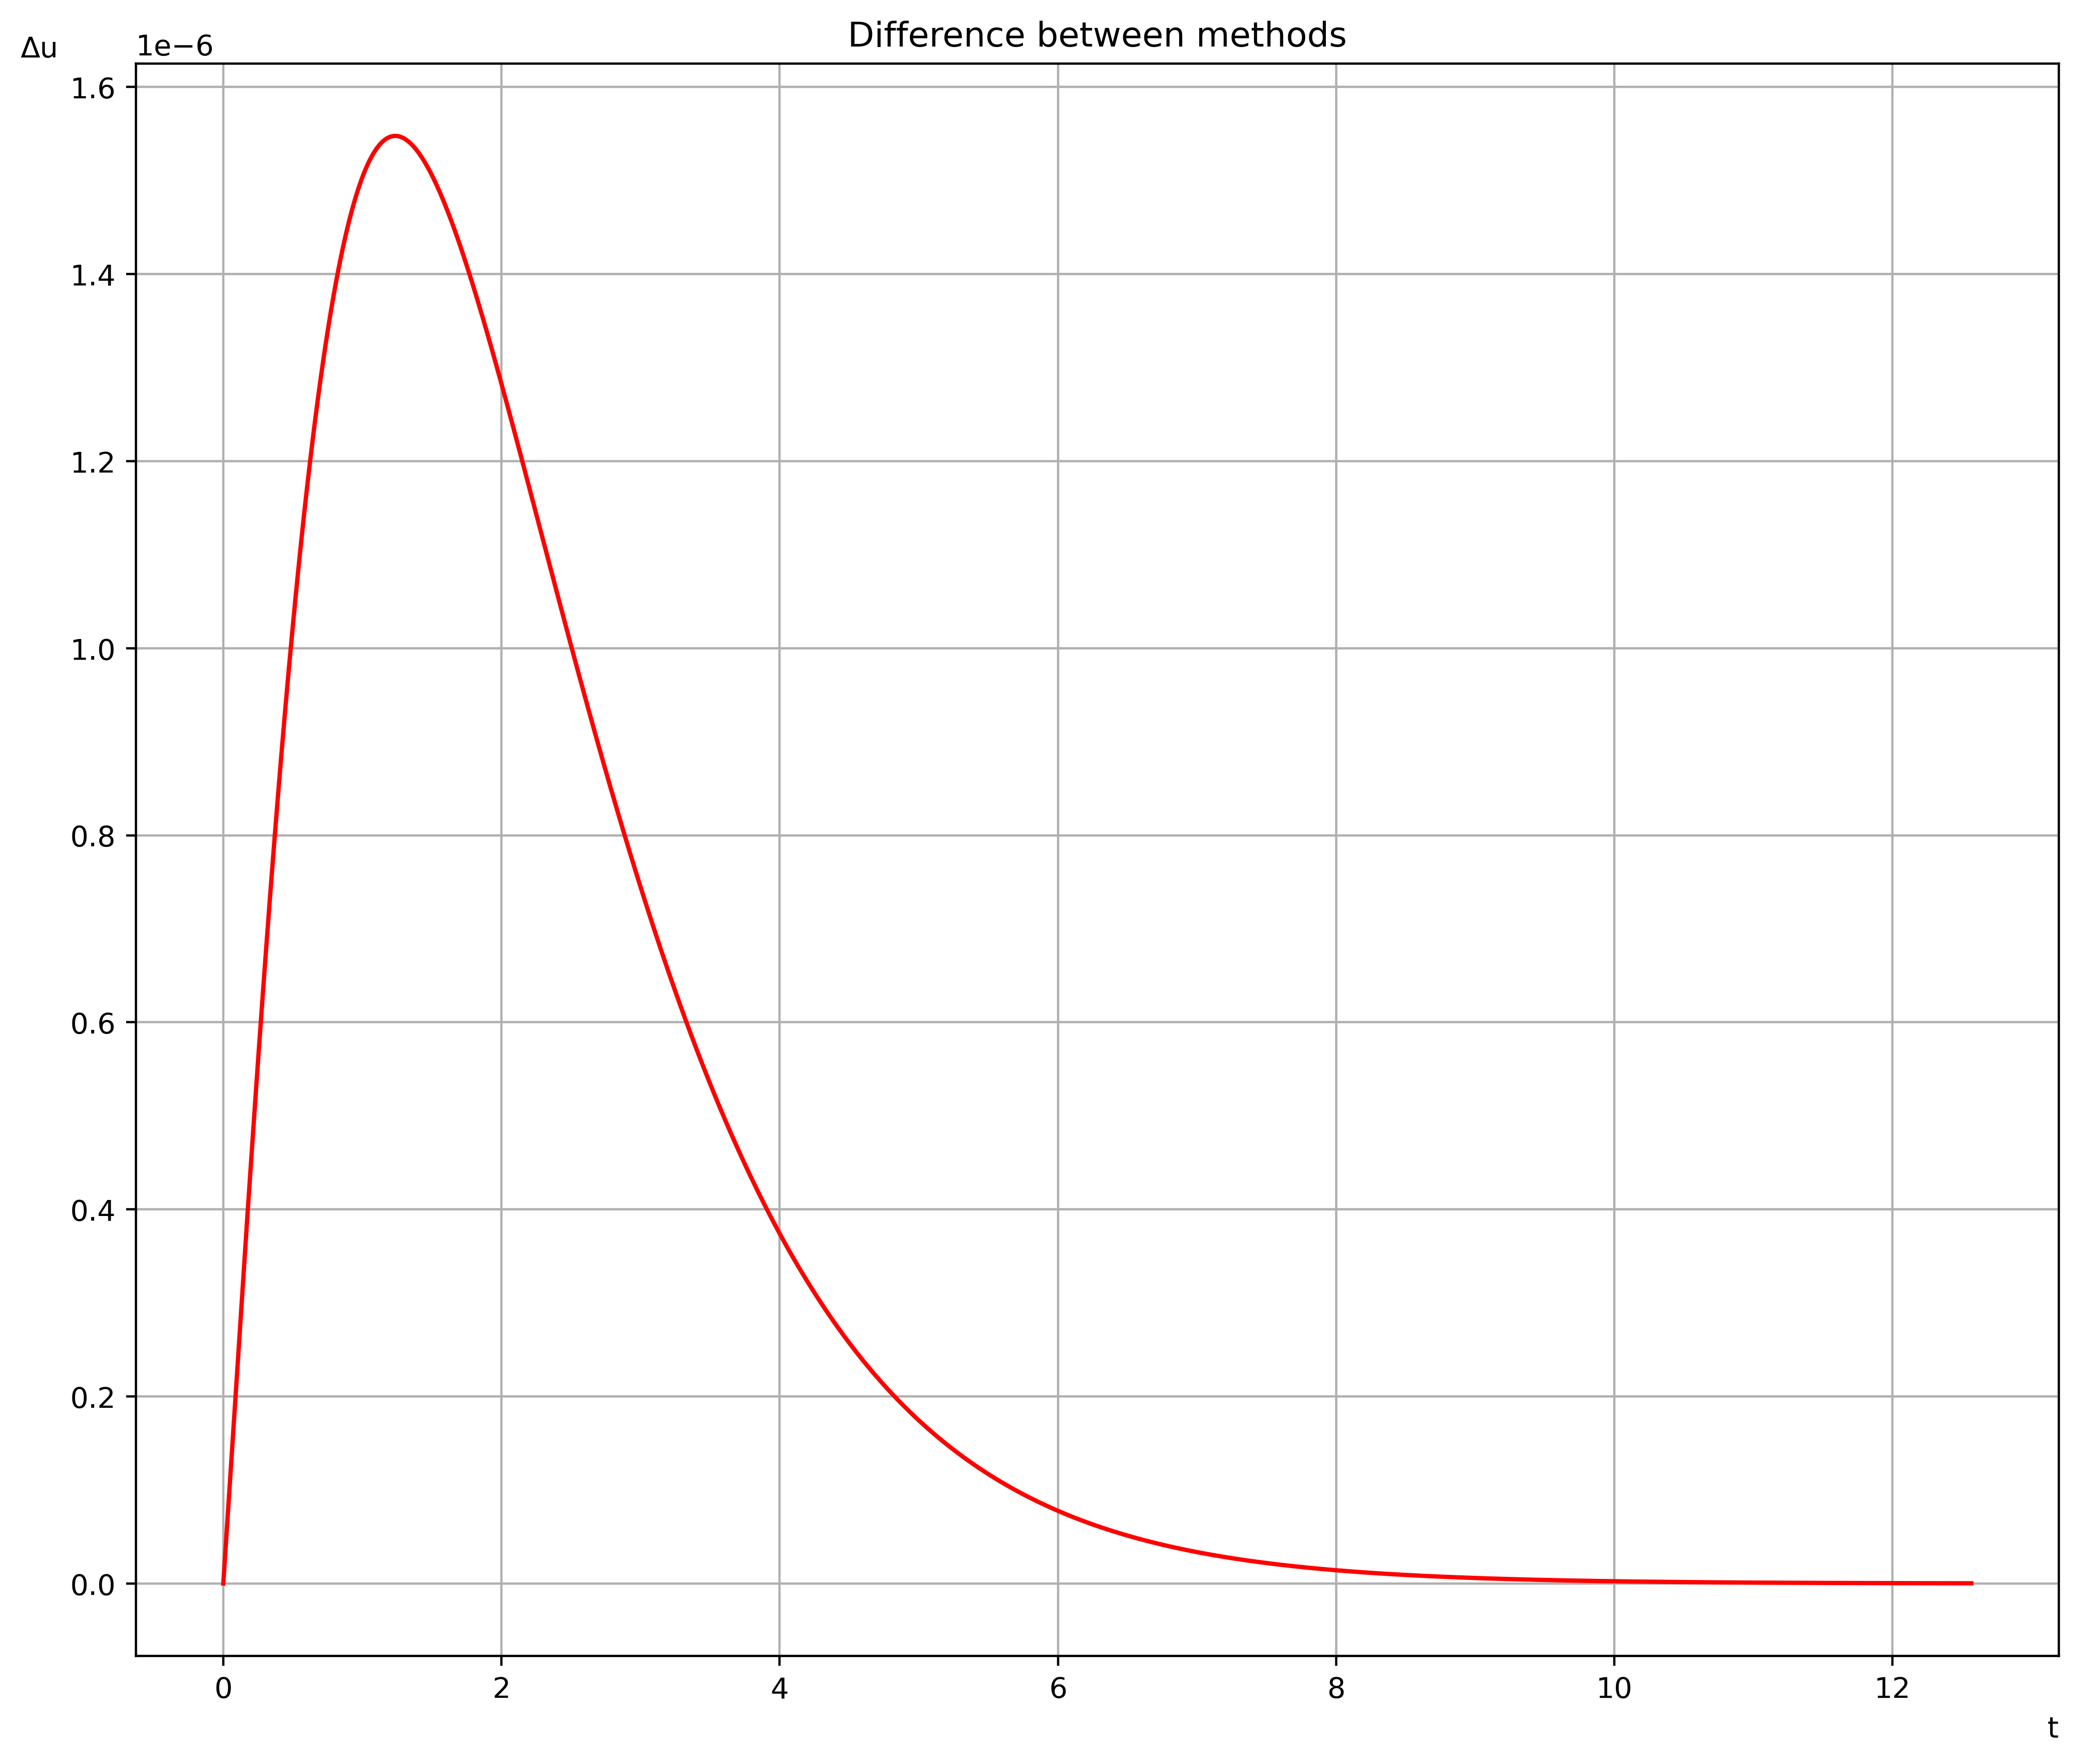

In [8]:
u_arr_E = np.array(u_list_E)
u_arr_RK = np.array(u_list_RK)
figComp, axComp = plt.subplots()
figComp.set_figheight(10)
figComp.set_figwidth(12)
axComp.set_title('Difference between methods')
axComp.set_xlabel('t', loc='right')
axComp.set_ylabel('Δu', loc='top', rotation='horizontal')
axComp.grid()
figComp.set_dpi(400)
axComp.plot(t_arr, np.abs(u_arr_RK - u_arr_E), '-r')
figComp.show()

/tmp/ipykernel_10106/1018503333.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figCompR.show()


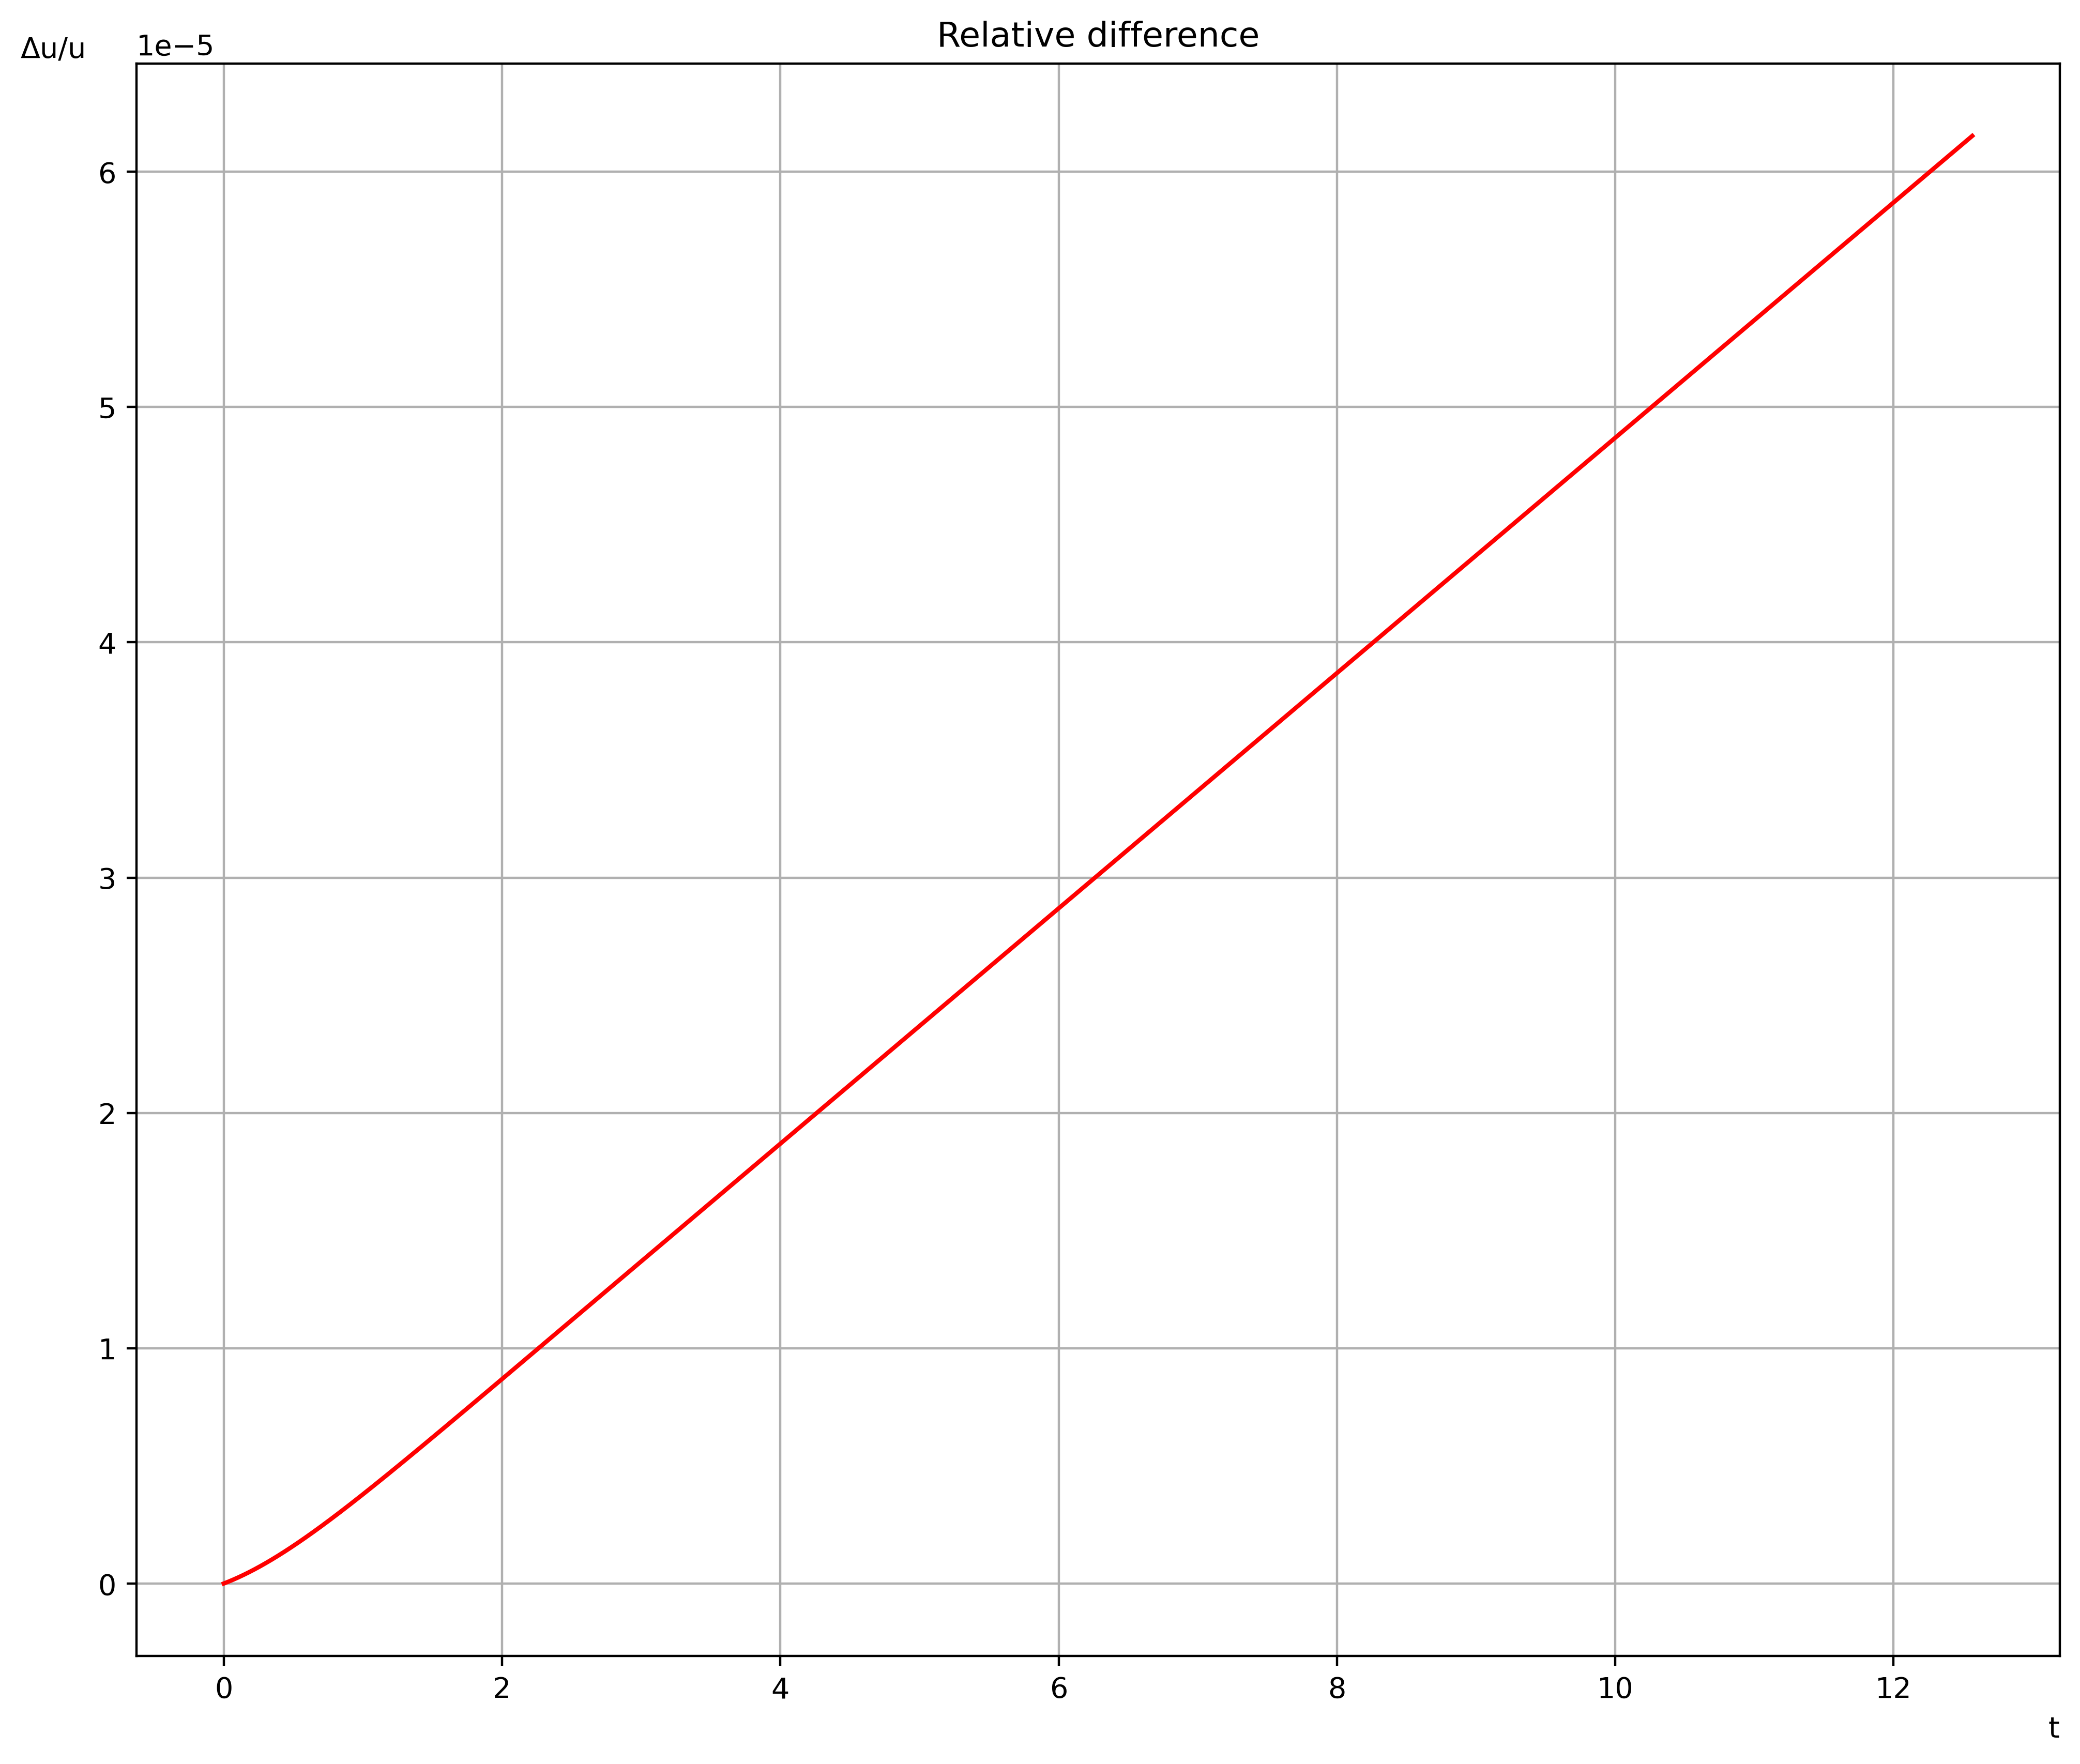

In [9]:
figCompR, axCompR = plt.subplots()
figCompR.set_figheight(10)
figCompR.set_figwidth(12)
axCompR.set_title('Relative difference')
axCompR.set_xlabel('t', loc='right')
axCompR.set_ylabel('Δu/u', loc='top', rotation='horizontal')
axCompR.grid()
figCompR.set_dpi(400)
axCompR.plot(t_arr, np.abs((u_arr_RK - u_arr_E) / u_arr_RK), '-r')
figCompR.show()

/tmp/ipykernel_10106/2644091861.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figConv.show()


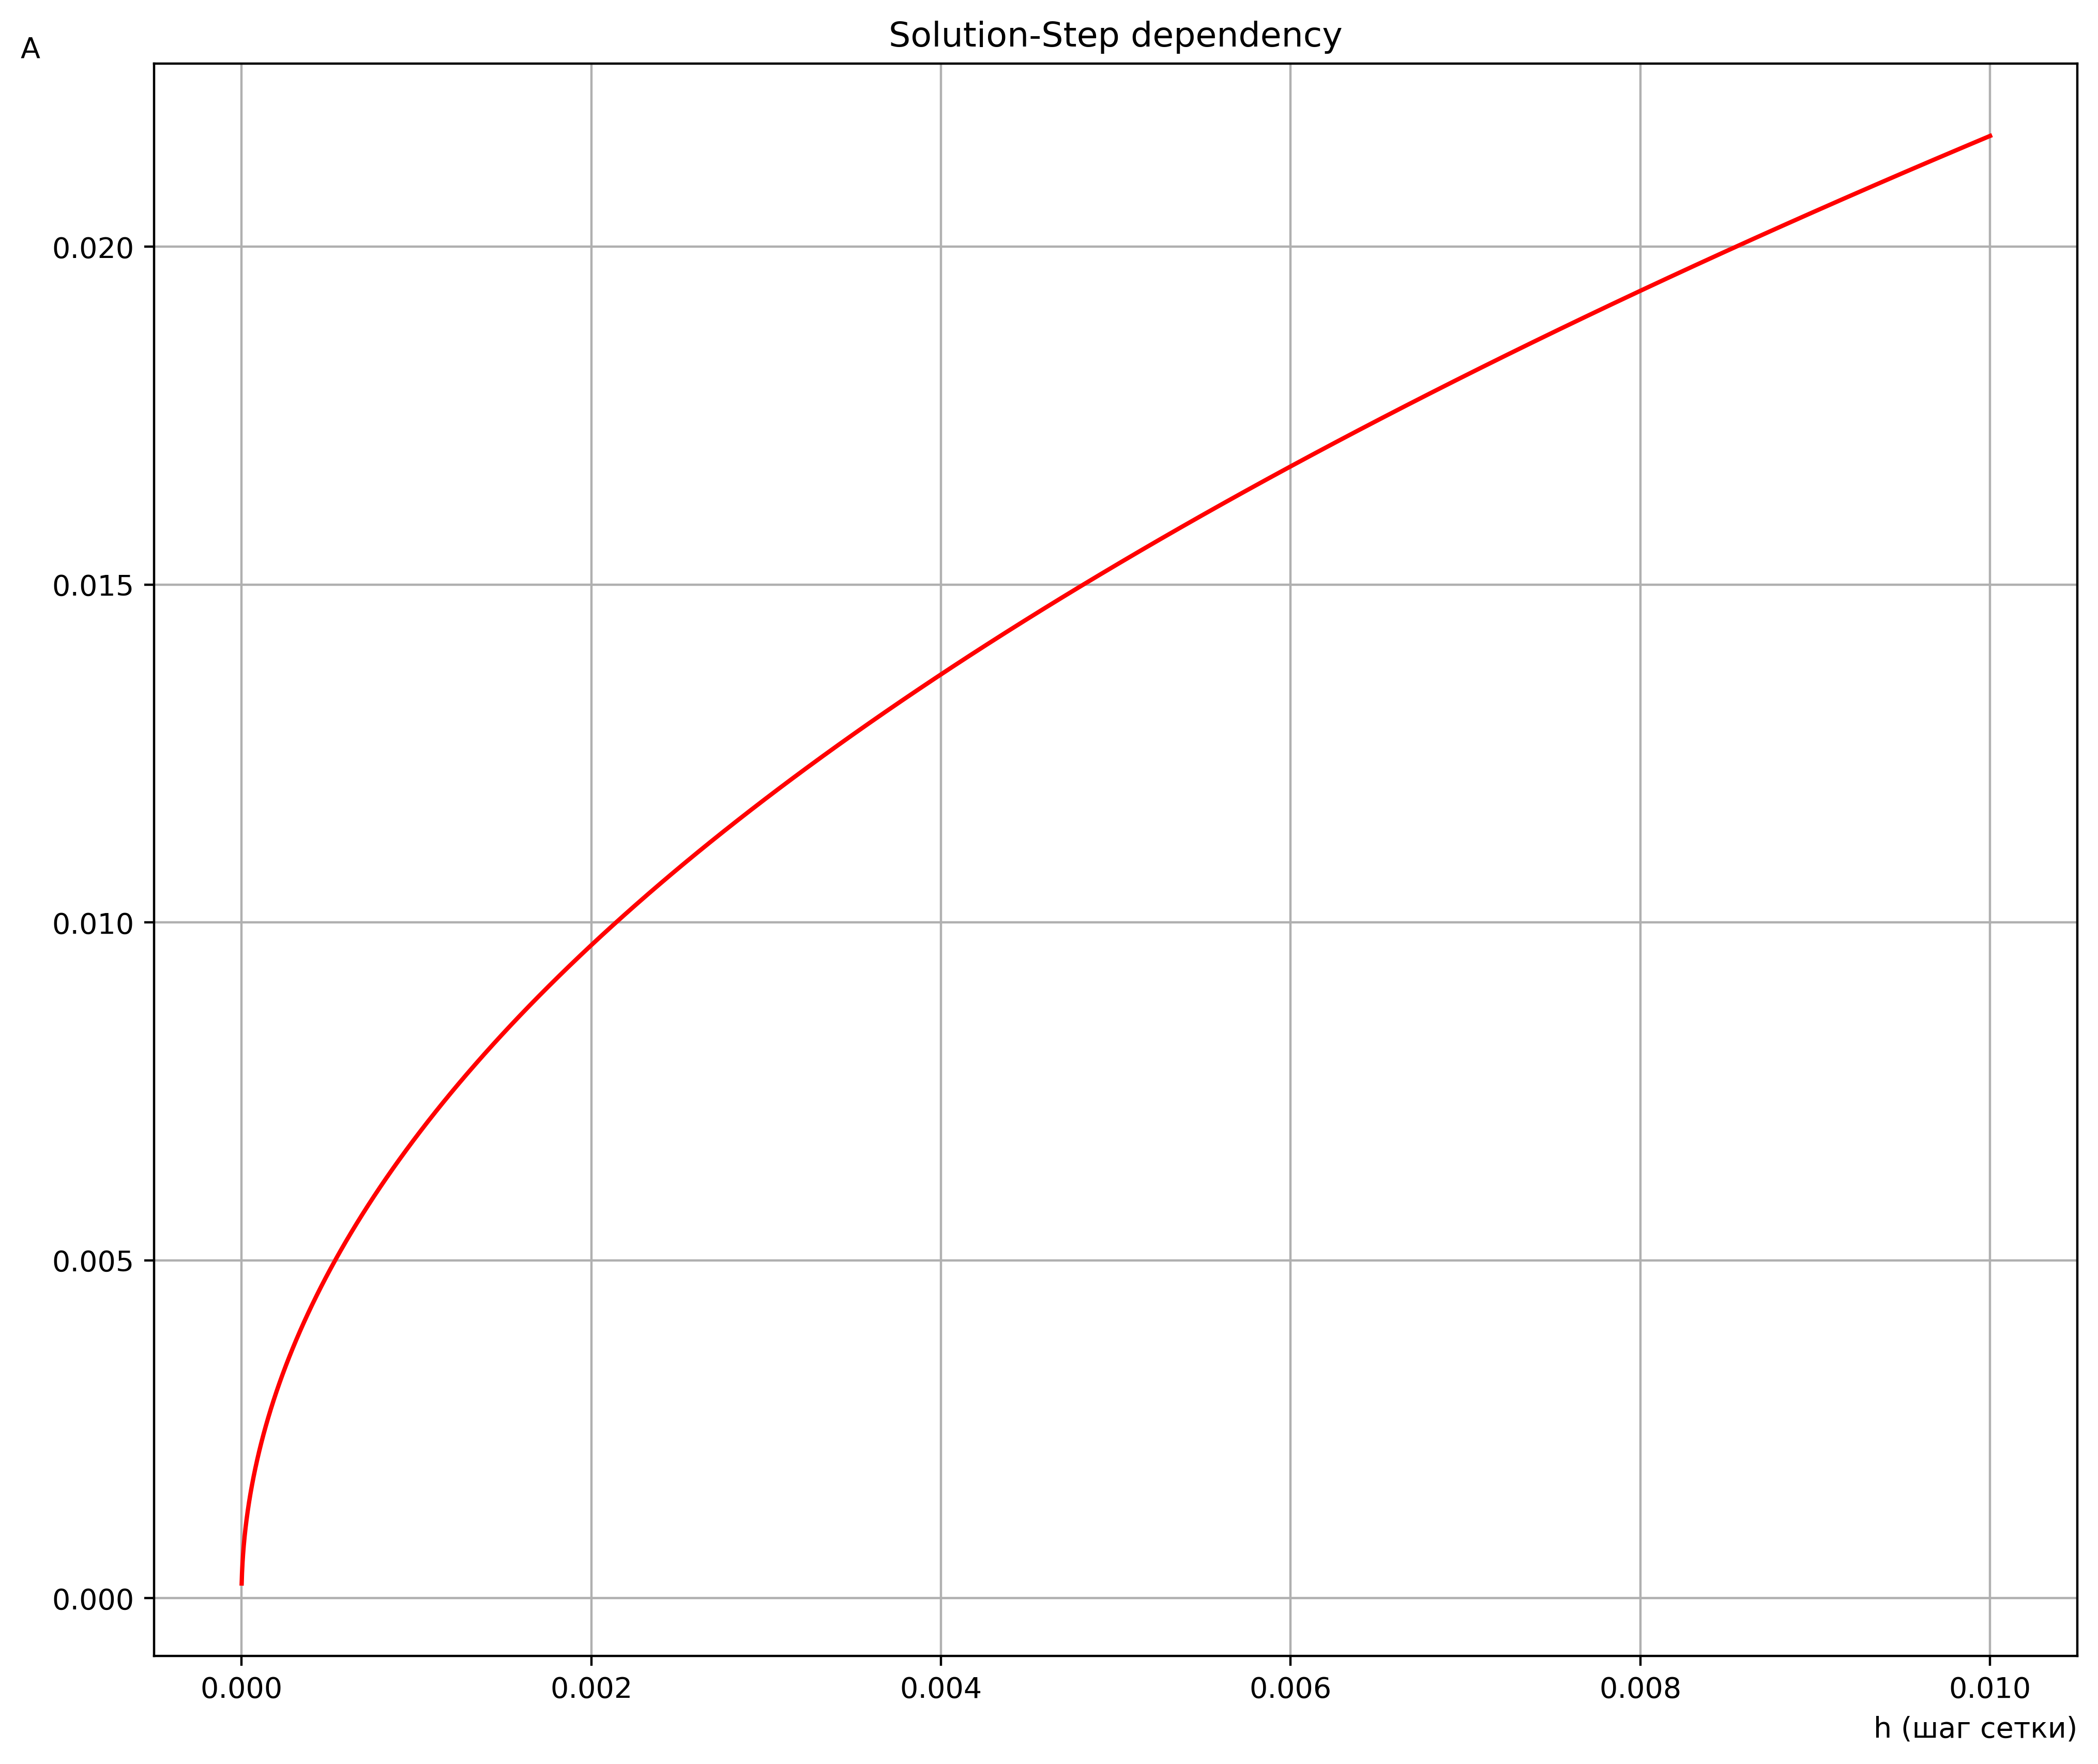

In [10]:
def Euler(step: float) -> np.ndarray:
        nnodes = (RBOUND - LBOUND) // step
        u_list = [u_lbound]
        while len(u_list) < nnodes:
                u_list.append(f(u_list[-1]) * step + u_list[-1])
        return np.array(u_list)

def Runge_Kutta(step: float) -> np.ndarray:
        nnodes = (RBOUND - LBOUND) // step
        u_list = [u_lbound]
        while len(u_list) < nnodes:
                u = u_list[-1]
                k1 = step * f(u)
                k2 = step * f(u + k1 / 2)
                k3 = step * f(u + k2 / 2)
                k4 = step * f(u + k3)
                u_list.append(u + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        return np.array(u_list)

STEP_LBOUND = 1e-6
STEP_RBOUND = 1e-2
STEP_STEP = 1e-6

diff_list = list()
step_arr = np.arange(STEP_LBOUND, STEP_RBOUND, STEP_STEP)

for step in step_arr:
        u_arr_E = Euler(step)
        u_arr_RK = Runge_Kutta(step)
        diff_list.append(sqrt(sum(np.power(u_arr_E - u_arr_RK, 2))))

figConv, axConv = plt.subplots()
figConv.set_figheight(10)
figConv.set_figwidth(12)
axConv.set_title('Solution-Step dependency')
axConv.set_xlabel('h (шаг сетки)', loc='right')
axConv.set_ylabel('A', loc='top', rotation='horizontal')
axConv.grid()
figConv.set_dpi(400)
axConv.plot(step_arr, diff_list, '-r')
figConv.show()